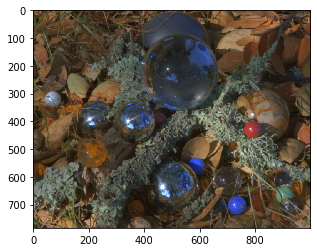

In [4]:
#desperat forsøk på implisitt 2d poisson
import numpy as np
import matplotlib.pyplot as plt
import imageio
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve

file= '../../hdr-bilder/Balls/Balls_00032.png'
u=imageio.imread(file)
#u = np.sum(u.astype(float),2) /(3*255)   # konverter til gråtone
u = u.astype(float) / 255

u[u<0]=0
u[u>1]=1

alpha = 0.45    #dt/dx**2


#lager diagonalmatrise
size=u.shape[0]*u.shape[1]

nupper = np.concatenate((np.zeros(u.shape[1]), -alpha * np.ones(size - u.shape[1])))
upper = np.concatenate(([0, 0], -alpha * np.ones(size - 2)))
center = np.concatenate(([1], (1 + 4 * alpha) * np.ones(size - 2), [1]))
lower = np.concatenate((-alpha * np.ones(size - 2), [0, 0]))
nlower = np.concatenate((-alpha * np.ones(size - u.shape[1]), np.zeros(u.shape[1])))
diags = np.array([nupper, upper, center, lower, nlower])
A = spdiags(diags, [u.shape[1], 1, 0, -1, -u.shape[1]], size, size).tocsc()


x=np.copy(u)
for i in range (u.shape[2]):
    x[:,:,i]=spsolve(A,x[:,:,i].flatten()).reshape(u[:,:,i].shape)
    x[:, 0,] = x[:, 1]      # Neumann randbetingelse
    x[:, -1] = x[:, -2]    #
    x[0, :] = x[1, :]      #
    x[-1, :] = x[-2 , :]   #
    
plt.figure()
plt.imshow(x)
plt.show()
        